In [ ]:
%matplotlib inline


# Path effects guide

Defining paths that objects follow on a canvas.

.. py:currentmodule:: matplotlib.patheffects

Matplotlib's :mod:`.patheffects` module provides functionality to apply a
multiple draw stage to any Artist which can be rendered via a `.path.Path`.

Artists which can have a path effect applied to them include `.patches.Patch`,
`.lines.Line2D`, `.collections.Collection` and even `.text.Text`. Each artist's
path effects can be controlled via the `.Artist.set_path_effects` method,
which takes an iterable of `AbstractPathEffect` instances.

The simplest path effect is the `Normal` effect, which simply draws the artist
without any effect:


In [2]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

fig = plt.figure(figsize=(5, 1.5))
text = fig.text(0.5, 0.5, 'Hello path effects world!\nThis is the normal '
                          'path effect.\nPretty dull, huh?',
                ha='center', va='center', size=20)
text.set_path_effects([path_effects.Normal()])
plt.show()

<Figure size 500x150 with 0 Axes>

Whilst the plot doesn't look any different to what you would expect without
any path effects, the drawing of the text has now been changed to use the
path effects framework, opening up the possibilities for more interesting
examples.

## Adding a shadow

A far more interesting path effect than `Normal` is the drop-shadow, which we
can apply to any of our path based artists. The classes `SimplePatchShadow`
and `SimpleLineShadow` do precisely this by drawing either a filled patch or
a line patch below the original artist:



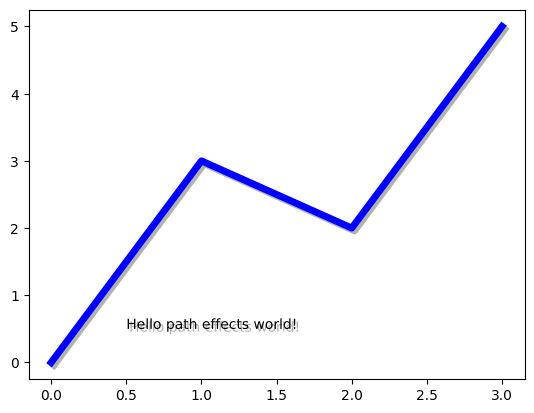

In [3]:
import matplotlib.patheffects as path_effects

text = plt.text(0.5, 0.5, 'Hello path effects world!',
                path_effects=[path_effects.withSimplePatchShadow()])

plt.plot([0, 3, 2, 5], linewidth=5, color='blue',
         path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
plt.show()

Notice the two approaches to setting the path effects in this example. The
first uses the ``with*`` classes to include the desired functionality
automatically followed with the "normal" effect, whereas the latter
explicitly defines the two path effects to draw.

## Making an artist stand out

One nice way of making artists visually stand out is to draw an outline in
a bold color below the actual artist. The :class:`Stroke` path effect makes
this a relatively simple task:



In [ ]:
fig = plt.figure(figsize=(7, 1))
text = fig.text(0.5, 0.5, 'This text stands out because of\n'
                          'its black border.', color='white',
                          ha='center', va='center', size=30)
text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'),
                       path_effects.Normal()])
plt.show()

It is important to note that this effect only works because we have drawn
the text path twice; once with a thick black line, and then once with the
original text path on top.

You may have noticed that the keywords to `Stroke` and `SimplePatchShadow`
and `SimpleLineShadow` are not the usual Artist keywords (*facecolor*
*edgecolor*, etc.). This is because with these path effects we are operating
at lower level of Matplotlib. In fact, the keywords which are accepted are
those for a `matplotlib.backend_bases.GraphicsContextBase` instance, which
have been designed for making it easy to create new backends - and not for
its user interface.


## Greater control of the path effect artist

As already mentioned, some of the path effects operate at a lower level
than most users will be used to, meaning that setting keywords such as
*facecolor* and *edgecolor* raise an AttributeError. Luckily there is a
generic `PathPatchEffect` path effect which creates a `.patches.PathPatch`
class with the original path.  The keywords to this effect are identical to
those of `.patches.PathPatch`:



In [ ]:
fig = plt.figure(figsize=(8.5, 1))
t = fig.text(0.02, 0.5, 'Hatch shadow', fontsize=75, weight=1000, va='center')
t.set_path_effects([
    path_effects.PathPatchEffect(
        offset=(4, -4), hatch='xxxx', facecolor='gray'),
    path_effects.PathPatchEffect(
        edgecolor='white', linewidth=1.1, facecolor='black')])
plt.show()

..
    Headings for future consideration:

    Implementing a custom path effect
    ---------------------------------

    What is going on under the hood
    --------------------------------

